In [1]:
#Visualization of instability issues in GAN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import matplotlib.lines as mlines
from scipy.stats import norm

from matplotlib import rc
import matplotlib as mpl
from matplotlib.legend_handler import HandlerLine2D

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
#1D distribution

#No intersection
x_axis_real = np.arange(-10, -3, 0.001)
x_real_1D = norm.pdf(x_axis_real,-5.0, .25)*2
#Intersection
#x_axis_real = np.arange(-10, 1, 0.001)
#x_real_1D = norm.pdf(x_axis_real,-0.5, .25)*2

x_axis1 = np.arange(-3, 1.5, 0.001)
x_1_1D = norm.pdf(x_axis1,0.0, .2)

x_axis2 = np.arange(1.5, 5, 0.001)
x_2_1D = norm.pdf(x_axis2, 3.0, .17)

x_axis3 = np.arange(5, 10, 0.001)
x_3_1D = norm.pdf(x_axis3, 7.0, .4)

In [3]:
#CDF calculation
cdf_model1 = norm.cdf(np.append(x_axis_real, x_axis1), 0.0, .2)/3

cdf_model2 = norm.cdf(x_axis2, 3.0, .17)
cdf_model2 = cdf_model2/3+cdf_model1[-1]

cdf_model3 = norm.cdf(x_axis3, 7.0, .4)
cdf_model3 = cdf_model3/3+cdf_model2[-1]
    
x_axis_real_cdf = np.arange(-10, 10, 0.001)
#No intersection
cdf_real = norm.cdf(x_axis_real_cdf,-5.0, .25)

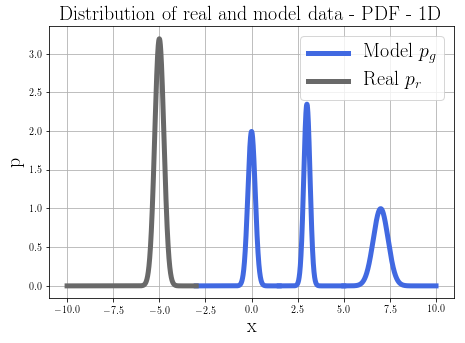

In [4]:
#1D visualization: PDF
fig = plt.gcf()
plt.subplot(121)
fig.set_size_inches(16,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(x_axis1, x_1_1D, linestyle='-', linewidth = 5, color='royalblue', label=r'Model $p_g$')
plt.plot(x_axis2, x_2_1D, linestyle='-', linewidth = 5, color='royalblue')
plt.plot(x_axis3, x_3_1D, linestyle='-', linewidth = 5, color='royalblue')

plt.plot(x_axis_real, x_real_1D, linestyle='-', linewidth = 5, color='dimgrey', label=r'Real $p_r$')

plt.xlabel(r'x', fontsize=20)
#plt.yticks([])
plt.ylabel(r"p", fontsize=20)

plt.grid(True)
plt.title(r"Distribution of real and model data - PDF - 1D", fontsize=20, color='black')

plt.legend(fontsize=20)

#Show
plt.show()

In [6]:
#Save - No intersection
#fig.savefig('Visualization_pdf_GAN.eps', format='eps', dpi=1000, bbox_inches = 'tight')

#Save - Intersection
fig.savefig('Visualization_pdf_GAN_intersection.eps', format='eps', dpi=1000, bbox_inches = 'tight')

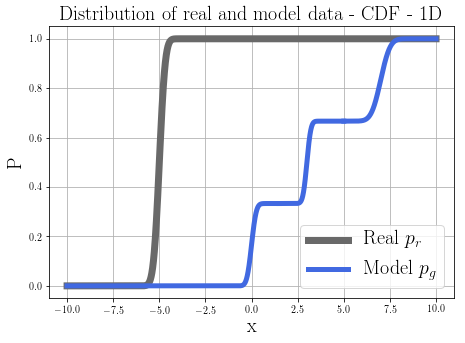

In [5]:
#1D visualization: CDF
fig = plt.gcf()
plt.subplot(121)
fig.set_size_inches(16,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(x_axis_real_cdf, cdf_real, linestyle='-', linewidth = 7, color='dimgrey', label=r'Real $p_r$')

plt.plot(np.append(x_axis_real, x_axis1), cdf_model1, linestyle='-', linewidth = 5, color='royalblue', label=r'Model $p_g$')
plt.plot(x_axis2, cdf_model2, linestyle='-', linewidth = 5, color='royalblue')
plt.plot(x_axis3, cdf_model3, linestyle='-', linewidth = 5, color='royalblue')

plt.xlabel(r'x', fontsize=20)
plt.ylabel(r"P", fontsize=20)

plt.grid(True)
plt.title(r"Distribution of real and model data - CDF - 1D", fontsize=20, color='black')

plt.legend(fontsize=20)


#Show
plt.show()

In [8]:
#Save
fig.savefig('Visualization_cdf_GAN.eps', format='eps', dpi=1000, bbox_inches = 'tight')

In [6]:
#Code parts: https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib
#Grid
#Intersection 
x_real, y_real = np.mgrid[-7.0:1.0:400j, -4.0:4.0:400j]
#x_real, y_real = np.mgrid[-7.0:-2.0:400j, -4.0:4.0:400j]

x1, y1 = np.mgrid[-2.0:2.0:400j, -4.0:4.0:400j]
x2, y2 = np.mgrid[2.0:5.0:300j, -4.0:4.0:300j]
x3, y3 = np.mgrid[5.0:9.0:400j, -4.0:4.0:400j]

# Need an (N, 2) array of (x, y) pairs.
xy_real = np.column_stack([x_real.flat, y_real.flat])

xy1 = np.column_stack([x1.flat, y1.flat])
xy2 = np.column_stack([x2.flat, y2.flat])
xy3 = np.column_stack([x3.flat, y3.flat])

In [7]:
#Model: 3 hills
mu1 = np.array([0.0, 0.0])
sigma1 = np.array([.2, .2])
covariance1 = np.diag(sigma1**2)

mu2 = np.array([3.0, 0.0])
sigma2 = np.array([.17, .17])
covariance2 = np.diag(sigma2**2)

mu3 = np.array([7.0, 0.0])
sigma3 = np.array([.4, .4])
covariance3 = np.diag(sigma3**2)

z1 = multivariate_normal.pdf(xy1, mean=mu1, cov=covariance1)
z2 = multivariate_normal.pdf(xy2, mean=mu2, cov=covariance2)
z3 = multivariate_normal.pdf(xy3, mean=mu3, cov=covariance3)

#Real: 1 Hill
#Intersection 
mu_real = np.array([-0.5, 0.0])
#mu_real = np.array([-5.0, 0.0])
sigma_real = np.array([.25, .25])
covariance_real = np.diag(sigma_real**2)

z_real = multivariate_normal.pdf(xy_real, mean=mu_real, cov=covariance_real)

In [8]:
#Second visualization 
#Approximation for distribution
z1_filtered = z1>0.1
z2_filtered = z2>0.1
z3_filtered = z3>0.1

z_real_filtered = z_real>0.1 
#z_real_filtered_1 = (z_real > 0.1) & (z_real < 0.2)
#z_real_filtered_1 = (z_real > 0.1) & (y_real < 0.05) & (y_real > -0.05)
#z_real_filtered_1.shape

In [9]:
# Reshape back to a (30, 30) grid.
z1 = z1.reshape(x1.shape)
z2 = z2.reshape(x2.shape)
z3 = z3.reshape(x3.shape)
z_real = z_real.reshape(x_real.shape)*2.4

z_real.shape

(400, 400)

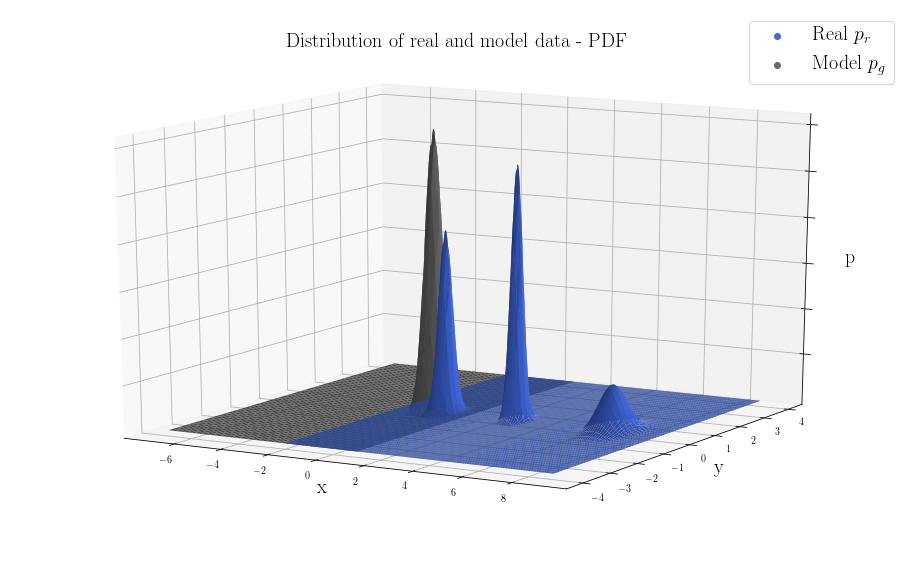

In [10]:
# Plot the cdf
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax = fig.add_subplot(111, projection='3d')

#Plots
ax.plot_surface(x1,y1,z1, color='royalblue')
ax.plot_surface(x2,y2,z2, color='royalblue')
ax.plot_surface(x3,y3,z3, color='royalblue')
ax.plot_surface(x_real,y_real,z_real, color='dimgrey')

#plt.grid(True)
plt.title(r"Distribution of real and model data - PDF", fontsize=20, color='black')
ax.set_xlabel(r'x', fontsize=20)
ax.set_ylabel(r'y', fontsize=20)
ax.set_zlabel(r'p', fontsize=20)
ax.set_zticklabels([])
ax.tick_params('x', width=20)
ax.tick_params('y', width=20)

#Legend
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='royalblue', marker = 'o')
#ax.legend([fake2Dline], [r'Model $p_r$'], numpoints = 1, fontsize=20)
fake2Dline2 = mpl.lines.Line2D([0],[0], linestyle="none", c='dimgrey', marker = 'o')
ax.legend([fake2Dline, fake2Dline2], [r'Real $p_r$', r'Model $p_g$'], numpoints = 1, fontsize=20)

ax.view_init(15, -60)

#Show
plt.show()

In [ ]:
#Save
fig.savefig('Visualization_Instability_GAN.eps', format='eps', dpi=1000, bbox_inches = 'tight')

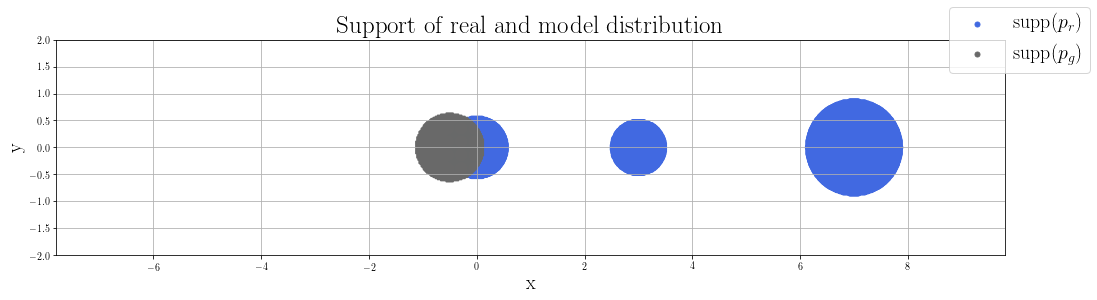

In [11]:
#Plot
fig = plt.gcf()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

fig.set_size_inches(17,7)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.scatter(x1, y1, z1_filtered, color='royalblue', linewidths = 5)
label_model = mlines.Line2D([], [], color='royalblue', marker='.', linestyle='None', markersize=10, label=r'$\mathrm{supp}(p_r)$')
plt.scatter(x2, y2, z2_filtered, color='royalblue', linewidths = 5)
plt.scatter(x3, y3, z3_filtered, color='royalblue', linewidths = 5)

plt.scatter(x_real, y_real, z_real_filtered, color='dimgrey')
#Filter for lower dimension visualization
#plt.scatter(x_real, y_real, z_real_filtered_1, color='dimgrey')

label_real = mlines.Line2D([], [], color='dimgrey', marker='.', linestyle='None', markersize=10, label=r'$\mathrm{supp}(p_g)$')
                            
plt.ylabel(r"y", fontsize=20)
plt.xlabel(r'x', fontsize=20)

plt.ylim(-2, 2)
plt.title(r"Support of real and model distribution", fontsize=25, color='black')

#Legend
plt.legend(handles=[label_model, label_real], fontsize=20, loc='upper right', scatterpoints=1, bbox_to_anchor=(1.1, 1.2))
 
#Show
plt.show()

In [ ]:
#Save
#No intersection
#fig.savefig('Visualization_Instability_GAN_2D.eps', format='eps', dpi=1000, bbox_inches = 'tight')

#Intersection 
#fig.savefig('Visualization_Instability_GAN_2D_Intersection.eps', format='eps', dpi=1000, bbox_inches = 'tight')

#Intersection filtered
fig.savefig('Visualization_Instability_GAN_2D_Intersection_filt.eps', format='eps', dpi=1000, bbox_inches = 'tight')

In [12]:
#Sample from multivariate PDF
sample_quantity=100

real_samples=np.zeros((3*sample_quantity, 2))
model_samples=np.zeros((3*sample_quantity, 2))
model_samples_non_overlap=np.zeros((3*sample_quantity, 2))
model_samples_high_var=np.zeros((3*sample_quantity, 2))

for idx in range(sample_quantity): 
    real_samples[idx,0] = np.random.normal(mu1[0], sigma1[0]) 
    real_samples[idx,1] = np.random.normal(mu1[1], sigma1[1]) 
for idx in range(sample_quantity): 
    real_samples[idx+sample_quantity,0] = np.random.normal(mu2[0], sigma2[0]) 
    real_samples[idx+sample_quantity,1] = np.random.normal(mu2[1], sigma2[1]) 
for idx in range(sample_quantity): 
    real_samples[idx+2*sample_quantity,0] = np.random.normal(mu3[0], sigma3[0]) 
    real_samples[idx+2*sample_quantity,1] = np.random.normal(mu3[1], sigma3[1])

for idx in range(3*sample_quantity): 
    model_samples[idx, 0] = np.random.normal(mu_real[0], sigma_real[0])
    model_samples[idx, 1] = np.random.normal(mu_real[1], sigma_real[1])
    
mu_real_non_overlap = np.array([-5.0, 0.0])
for idx in range(3*sample_quantity): 
    model_samples_non_overlap[idx, 0] = np.random.normal(mu_real_non_overlap[0], sigma_real[0])
    model_samples_non_overlap[idx, 1] = np.random.normal(mu_real_non_overlap[1], sigma_real[1])
    
mu_real_high_var = np.array([-3.0, 0.0])
sigma_real_high_var = np.array([2.0, 2.0])
for idx in range(3*sample_quantity): 
    model_samples_high_var[idx, 0] = np.random.normal(mu_real_high_var[0], sigma_real_high_var[0])
    model_samples_high_var[idx, 1] = np.random.normal(mu_real_high_var[1], sigma_real_high_var[1])

In [13]:
def Mean_kernel_estimation(real_sequence, model_sequence): 
    '''
        Explanation:    Kernel sigma estimation by mean distance between sequences.
        ------------ 
        Reference:      [2] Ramdas.2015.AdaptivityComputation_StatisticsTradeoffsKernelDistance
        ----------
        Parameters:      
        -----------
            real_sequence       Sequence 1 for kernel estimation
            model_sequence      Sequence 2 for kernel estimation
    '''
    
    #Sequence length: batch, length, features
    length_seq = real_sequence.shape[1]
    
    #Euclidean distance between each sample in sequence
    euclidean_dist = np.zeros((length_seq * length_seq * 2 * 2, 1))
#    for idx in range(length_seq):
#        euclidean_dist[idx] = np.linalg.norm(real_sequence[0, idx]-model_sequence[0, idx])
#        
#    return np.mean(euclidean_dist)
    
    aggregat_sequence = np.concatenate((real_sequence, model_sequence), axis = 1)
    last_idx = 0
    for index_seq in range(length_seq * 2): 
        for ix_seq in range(length_seq * 2): 
            euclidean_dist[last_idx + ix_seq] = np.linalg.norm(aggregat_sequence[0, index_seq] - aggregat_sequence[0, ix_seq])
        last_idx = last_idx + ix_seq + 1
        
    return np.median(euclidean_dist)

In [27]:
def Kernel_function(x, 
                    y, 
                    sigma = 1, 
                    kernel_distance = 'L2'): 
    '''
        Explanation:    Application of the gaussain RBF kernel
        ------------ 
        Reference:      [1] Hyland.2017.RealValuedMedicalTimeSeriesGenerationRecurrentGANs
        ----------
        Parameters:      
        -----------
            x                   Sample (From real sequence i.e.)
            y                   Sample (From model sequence i.e.)
            sigma               Kernel sigma (Needs to be estimated beforehand)
            kernel_distance     Distance (L2, Frobenius, ...)
    '''
    d = np.exp(-(np.linalg.norm(x-y)**2)/(2*(sigma**2)))
    #print(d)
    
    return d

In [30]:
def Maximum_Mean_Discrepancy(real_sequence, 
                             model_sequence, 
                             sigma = 1, 
                             sigma_estimation = True, 
                             kernel_distance = 'L2', 
                             lag_penalty = False): 
    
    '''
        Explanation:    Maximum Mean Discrepancy (MMD) to define a statistical 
        ------------    validation criteria between a real and a synthetical 
                        object list. 
        
        Reference:      [1] Hyland.2017.RealValuedMedicalTimeSeriesGenerationRecurrentGANs
        ----------      
        
        Parameters:      
        -----------
            real_sequence       Real sequence (x in [1]) 1*timestamps*features
            model_sequence      Model sequence (y in [1])
            sigma               Kernel bandwidth
            kernel_distance     Norm definition for kernel
    '''
    
    #Time sequences lengths
    length_real = real_sequence.shape[1]
    length_model = model_sequence.shape[1]
    
    #Kernel estimation
    if sigma_estimation == True: 
        sigma = Mean_kernel_estimation(real_sequence, model_sequence)
    
    #MMD factors
    D_1_factor = 1/float(length_real*(length_real-1))
    D_2_factor = 1/float(length_model*(length_model-1))
    D_3_factor = 2/float(length_real*length_model)
    
    #MMD separation into three parts
    D_1 = 0
    D_2 = 0
    D_3 = 0
    
    for i in range(length_real): 
        for j in range(length_real): 
            if not (i==j):
                D_1 = D_1 + Kernel_function(real_sequence[0,i,:], 
                                            real_sequence[0,j,:], 
                                            sigma = sigma)
    D_1 = D_1_factor*D_1
    
    for i in range(length_model): 
        for j in range(length_model): 
            if not (i==j):
                D_2 = D_2 + Kernel_function(model_sequence[0,i,:], 
                                            model_sequence[0,j,:], 
                                            sigma = sigma)
    D_2 = D_2_factor * D_2
    
    for i in range(length_real): 
        for j in range(length_model): 
                D_3 = D_3 + Kernel_function(real_sequence[0,i,:], 
                                            model_sequence[0,j,:], 
                                            sigma = sigma)
    D_3 = D_3_factor * D_3
    print(D_1)
    print(D_2)
    print(D_3)
    
    #Maximum Mean Discrepancy
    D_mmd = D_1 + D_2 - D_3 
    
    if lag_penalty: 
        lag_penalty_weight = 0.1
        
        lag_penalty_total = 0
        for idx, value in enumerate(real_sequence[0]):
            if idx>0: 
                lag_penalty_total += np.linalg.norm(((real_sequence[0,idx-1] - real_sequence[0, idx]) - (model_sequence[0, idx-1]-model_sequence[0, idx])))*lag_penalty_weight
                
        D_mmd_penalized = D_mmd + lag_penalty_total
        
        return D_mmd, D_mmd_penalized
    else:     
        return (D_mmd)

In [17]:
real_samples_extended = np.expand_dims(real_samples, axis=0)
model_samples_extended = np.expand_dims(model_samples, axis=0)
model_samples_non_overlap_extended = np.expand_dims(model_samples_non_overlap, axis=0)
model_samples_high_variance_extended = np.expand_dims(model_samples_high_var, axis=0)

mmd_1 = Maximum_Mean_Discrepancy(real_samples_extended, 
                                 model_samples_extended, 
                                 sigma = 1, 
                                 sigma_estimation = True, 
                                 kernel_distance = 'L2', 
                                 lag_penalty = False)

mmd_non_overlap = Maximum_Mean_Discrepancy(real_samples_extended, 
                                       model_samples_non_overlap_extended, 
                                       sigma = 1, 
                                       sigma_estimation = True, 
                                       kernel_distance = 'L2', 
                                       lag_penalty = False)

mmd_high_variance = Maximum_Mean_Discrepancy(real_samples_extended, 
                                 model_samples_high_variance_extended, 
                                 sigma = 1, 
                                 sigma_estimation = True, 
                                 kernel_distance = 'L2', 
                                 lag_penalty = False)



In [40]:
sample_quantity=20

real_samples=np.zeros((3*sample_quantity, 2))

for idx in range(sample_quantity): 
    real_samples[idx,0] = np.random.normal(mu1[0], sigma1[0]) 
    real_samples[idx,1] = np.random.normal(mu1[1], sigma1[1]) 
for idx in range(sample_quantity): 
    real_samples[idx+sample_quantity,0] = np.random.normal(mu2[0], sigma2[0]) 
    real_samples[idx+sample_quantity,1] = np.random.normal(mu2[1], sigma2[1]) 
for idx in range(sample_quantity): 
    real_samples[idx+2*sample_quantity,0] = np.random.normal(mu3[0], sigma3[0]) 
    real_samples[idx+2*sample_quantity,1] = np.random.normal(mu3[1], sigma3[1])
    
real_samples_2=np.zeros((3*sample_quantity, 2))

for idx in range(sample_quantity): 
    real_samples_2[idx,0] = np.random.normal(mu1[0], sigma1[0]) 
    real_samples_2[idx,1] = np.random.normal(mu1[1], sigma1[1]) 
for idx in range(sample_quantity): 
    real_samples_2[idx+sample_quantity,0] = np.random.normal(mu2[0], sigma2[0]) 
    real_samples_2[idx+sample_quantity,1] = np.random.normal(mu2[1], sigma2[1]) 
for idx in range(sample_quantity): 
    real_samples_2[idx+2*sample_quantity,0] = np.random.normal(mu3[0], sigma3[0]) 
    real_samples_2[idx+2*sample_quantity,1] = np.random.normal(mu3[1], sigma3[1])
    
real_samples_extended = np.expand_dims(real_samples, axis=0)
real_samples_2_extended = np.expand_dims(real_samples_2, axis=0)

same_distr_mmd = Maximum_Mean_Discrepancy(real_samples_extended, 
                                 real_samples_2_extended, 
                                 sigma = 1, 
                                 sigma_estimation = True, 
                                 kernel_distance = 'L2', 
                                 lag_penalty = False)

0.583870691856
0.582658009203
1.1802967496


In [41]:
print('MMD between real samples and bad model: mmd = {}'.format(mmd_1))
print('MMD between real samples and non overlapping model: mmd = {}'.format(mmd_non_overlap))
print('MMD between real samples and high variance model: mmd = {}'.format(mmd_high_variance))
print('MMD between real samples and real samples: mmd = {}'.format(same_distr_mmd))

MMD between real samples and bad model: mmd = 0.5846434007713647
MMD between real samples and non overlapping model: mmd = 1.1423151160698755
MMD between real samples and high variance model: mmd = 0.6417213142113511
MMD between real samples and real samples: mmd = -0.013768048544074762


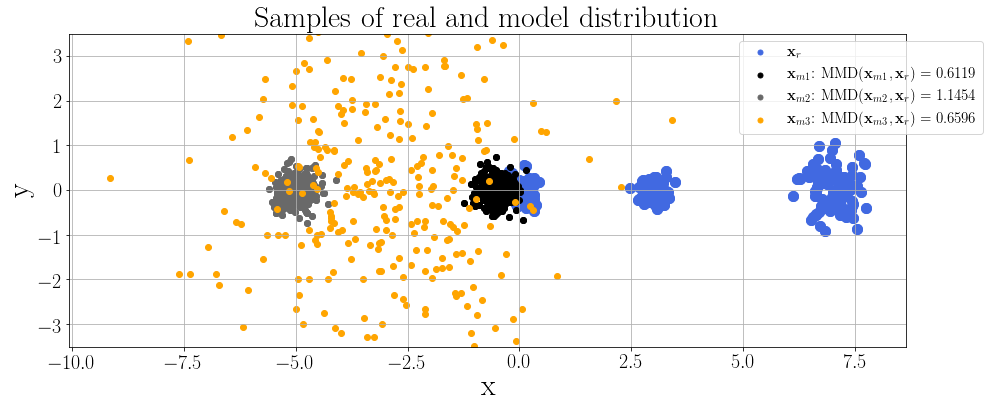

In [20]:
#Plot
fig = plt.gcf()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

fig.set_size_inches(15,10, forward=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.scatter(real_samples[:,0], real_samples[:,1], color='royalblue', linewidths = 5)
label_model = mlines.Line2D([], [], color='royalblue', marker='.', linestyle='None', markersize=10, 
                            label=r'$\mathbf{x}_r$')

plt.scatter(model_samples[:,0], model_samples[:,1], color='black')
label_real_1 = mlines.Line2D([], [], color='black', marker='.', 
                             linestyle='None', markersize=10, 
                             label=r'$\mathbf{x}_{m1}$: MMD($\mathbf{x}_{m1}, \mathbf{x}_{r})=$'+'{:10.4f}'.format(mmd_1))

plt.scatter(model_samples_non_overlap[:,0], model_samples_non_overlap[:,1], color='dimgrey')
label_real_2 = mlines.Line2D([], [], color='dimgrey', marker='.', 
                             linestyle='None', markersize=10, 
                             label=r'$\mathbf{x}_{m2}$: MMD($\mathbf{x}_{m2}, \mathbf{x}_{r})=$'+'{:10.4f}'.format(mmd_non_overlap))

plt.scatter(model_samples_high_var[:,0], model_samples_high_var[:,1], color='orange')
label_real_3 = mlines.Line2D([], [], color='orange', marker='.', 
                             linestyle='None', markersize=10, 
                             label=r'$\mathbf{x}_{m3}$: MMD($\mathbf{x}_{m3}, \mathbf{x}_{r})=$'+'{:10.4f}'.format(mmd_high_variance))

plt.ylabel(r"y", fontsize=30)
plt.xlabel(r'x', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(-3.5, 3.5)
plt.yticks(fontsize=20)

plt.title(r"Samples of real and model distribution", fontsize=30, color='black')

#Legend
plt.legend(handles=[label_model, label_real_1, label_real_2, label_real_3], fontsize=15, 
           loc='upper right', scatterpoints=1, bbox_to_anchor=(1.1, 1.0))
 
#Show
plt.show()

In [259]:
#Save
fig.savefig('MMD_example.eps', format='eps', dpi=1000, bbox_inches = 'tight')